# Módulo 6 tarefa 3

#### 1) A base 'sinasc_RO_2019.csv' contém dados do sistema de nascidos vivos do DataSUS, cujo dicionário de dados está no arquivo 'Estrutura_SINASC_para_CD.pdf'. Carregue esse arquivo.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('b1abb33c4f.csv')


#### 2) Categorize a variável APGAR5 conforme as seguintes quebras:

- 0 a 3: 'asfixia grave'
- 4 a 5: 'asfixia moderada'
- 6 a 7: 'asfixia leve'
- 8 a 10: 'normal'

In [2]:
def categorize_apgar5(value):
    if 0 <= value <= 3:
        return 'asfixia grave'
    elif 4 <= value <= 5:
        return 'asfixia moderada'
    elif 6 <= value <= 7:
        return 'asfixia leve'
    else:
        return 'normal'

data['APGAR5_CATEG'] = data['APGAR5'].apply(categorize_apgar5)


#### 3) Monte um gráfico comparando a distribuição de APGAR5 por sexo para cada grupo de tempo de gestação (GESTACAO).

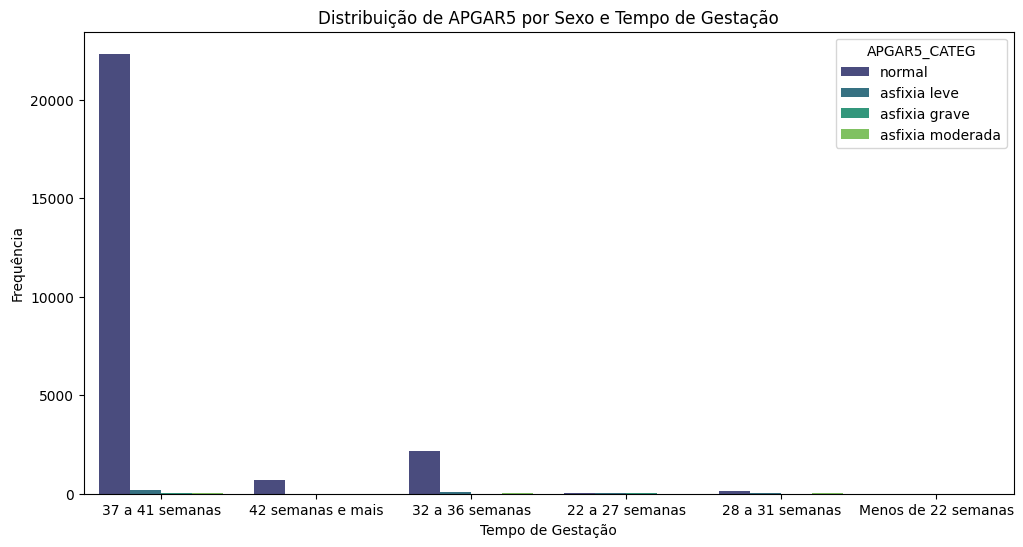

In [3]:
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='GESTACAO', hue='APGAR5_CATEG', palette='viridis')
plt.title('Distribuição de APGAR5 por Sexo e Tempo de Gestação')
plt.xlabel('Tempo de Gestação')
plt.ylabel('Frequência')
plt.show()


####  4) Monte uma tabela cruzada com APGAR5 nas colunas e GESTACAO nas linhas

In [4]:
crosstab = pd.crosstab(data['GESTACAO'], data['APGAR5_CATEG'])
print(crosstab)


APGAR5_CATEG         asfixia grave  asfixia leve  asfixia moderada  normal
GESTACAO                                                                  
22 a 27 semanas                 21            12                 1      52
28 a 31 semanas                  3            18                12     132
32 a 36 semanas                  8            73                19    2149
37 a 41 semanas                 33           196                28   22332
42 semanas e mais                1             6                 1     692
Menos de 22 semanas              2             1                 0       4


####  5) Da tabela cruzada do intem anterior, calcule os percentuais de linha. Ou seja, a distribuição da variável APGAR5 para cada classe de GESTACAO dado.

In [5]:
crosstab_perc = crosstab.div(crosstab.sum(axis=1), axis=0) * 100
print(crosstab_perc)


APGAR5_CATEG         asfixia grave  asfixia leve  asfixia moderada     normal
GESTACAO                                                                     
22 a 27 semanas          24.418605     13.953488          1.162791  60.465116
28 a 31 semanas           1.818182     10.909091          7.272727  80.000000
32 a 36 semanas           0.355714      3.245887          0.844820  95.553579
37 a 41 semanas           0.146089      0.867679          0.123954  98.862278
42 semanas e mais         0.142857      0.857143          0.142857  98.857143
Menos de 22 semanas      28.571429     14.285714          0.000000  57.142857


####  6) Os médicos costumam classificar parto prematuro quando a gestação tem menos que 37 semanas. Faça um gráfico de barras da tabela cruzada acima e conclua se você acha que este conjunto de dados corrobora ou não com a afirmação dos médicos.

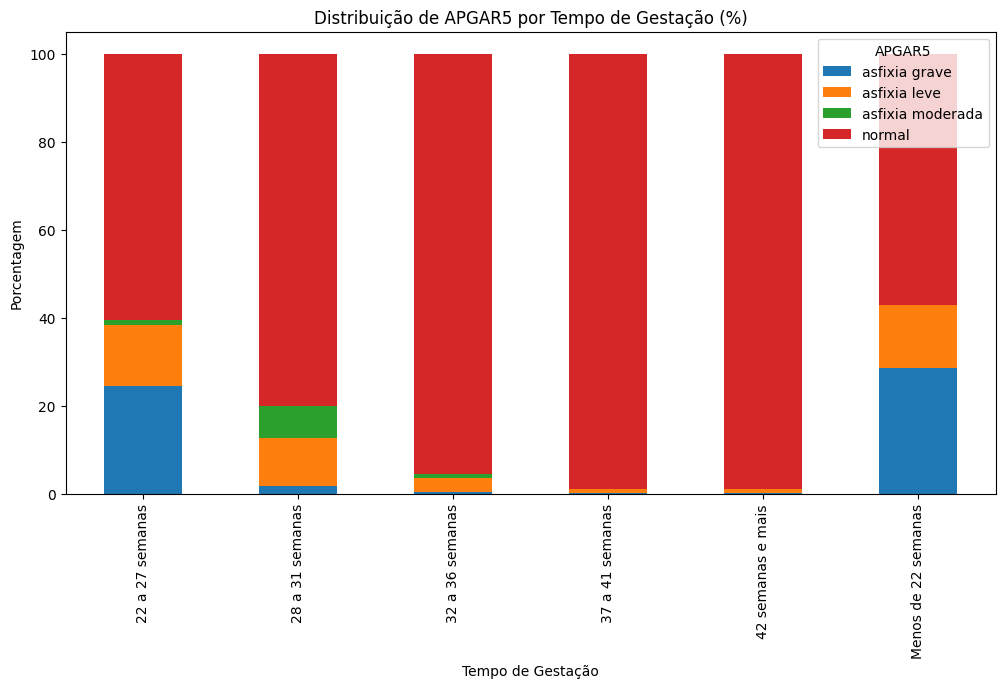

In [6]:
crosstab_perc.plot.bar(stacked=True, figsize=(12, 6))
plt.title('Distribuição de APGAR5 por Tempo de Gestação (%)')
plt.xlabel('Tempo de Gestação')
plt.ylabel('Porcentagem')
plt.legend(title='APGAR5')
plt.show()


#### 7) Veja se há relação entre APGAR5 e o peso do bebê. Isso pode ser feito de diversas formas. Fique à vontade para escolher a melhor maneira na sua opinião, ou até testar mais de um dos gráficos que vimos. Fique à vontade também para consultar a documentação e utilizar algum outro recurso se achar conveniente.

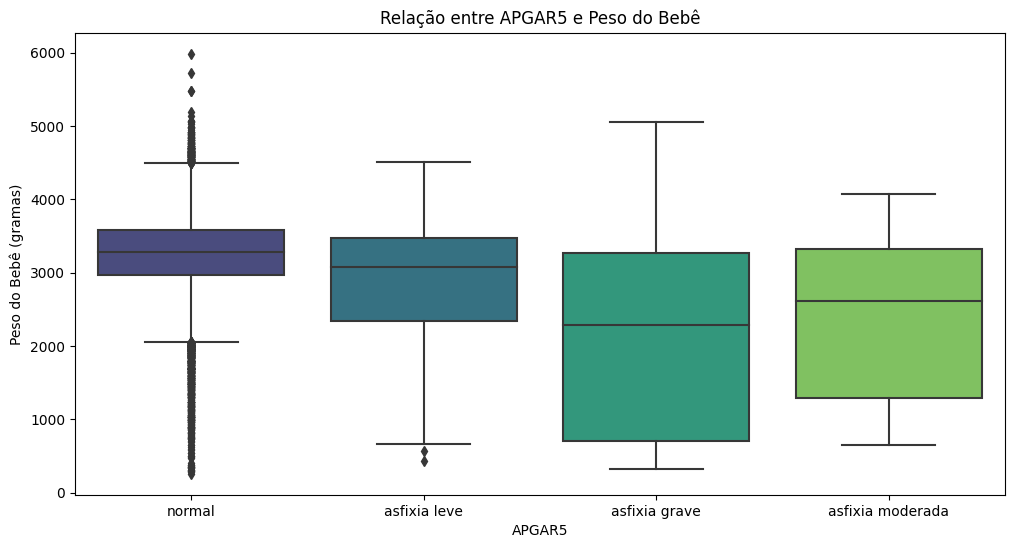

In [7]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x='APGAR5_CATEG', y='PESO', palette='viridis')
plt.title('Relação entre APGAR5 e Peso do Bebê')
plt.xlabel('APGAR5')
plt.ylabel('Peso do Bebê (gramas)')
plt.show()
